In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from coreLib.utils import inpaintredBox


In [2]:
def check_for_annotations(image_path, reference_colors):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Iterate over the reference colors
    for reference_color in reference_colors:
        # Define the lower and upper color thresholds
        lower_color = np.array(reference_color, dtype=np.uint8) - np.array([10, 50, 50], dtype=np.uint8)
        upper_color = np.array(reference_color, dtype=np.uint8) + np.array([10, 50, 50], dtype=np.uint8)

        # Create a mask by thresholding the image within the color range
        mask = cv2.inRange(hsv_image, lower_color, upper_color)

        # Count the number of non-zero pixels in the mask
        annotation_pixel_count = cv2.countNonZero(mask)

        # Check if any annotation pixels are found
        if annotation_pixel_count > 0:
            print(f"Annotations of color {reference_color} found in the image.")
        else:
            print(f"No annotations of color {reference_color} found in the image.")

# Provide the image path and reference colors (BGR format)

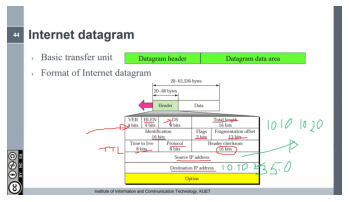

In [3]:
# Provide the image path and reference colors (BGR format)
image_path = '../images/video_MLT_pdf/frame3975.jpg'
reference_colors = [(0, 0, 255), (0, 255, 0)]  # Example: Red and green annotation colors

image = cv2.imread(image_path)

# Convert the image from BGR to RGB color format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [4]:
# Check for annotations in the image
check_for_annotations(image_path, reference_colors)


No annotations of color (0, 0, 255) found in the image.
No annotations of color (0, 255, 0) found in the image.


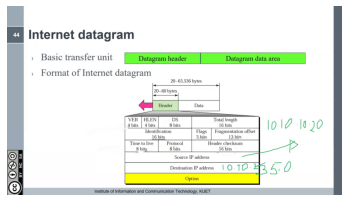

In [5]:
img = cv2.imread(image_path)
# remove annotattion paintng
annot_res = inpaintredBox(img) 

# Convert the image from BGR to RGB color format
image_rgb = cv2.cvtColor(annot_res, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

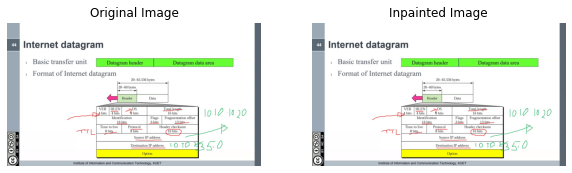

In [6]:
import cv2
import random 

image_path = '../images/video_MLT_pdf/frame3975.jpg'
image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue_min, saturation_min, value_min = 80, 30, 0
hue_max, saturation_max, value_max = 95, 255, 255

unwanted_color_lower = (hue_min, saturation_min, value_min)  # Minimum HSV values for unwanted color
unwanted_color_upper = (hue_max, saturation_max, value_max)  # Maximum HSV values for unwanted color

mask = cv2.inRange(hsv_image, unwanted_color_lower, unwanted_color_upper)

inpaint_result = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(inpaint_result, cv2.COLOR_BGR2RGB))
axes[1].set_title('Inpainted Image')
axes[1].axis('off')

plt.show()



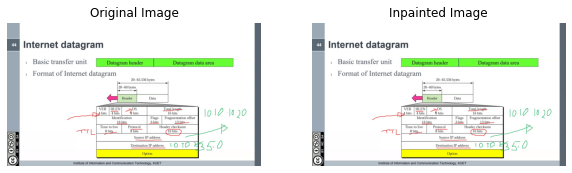

In [7]:
import cv2
import numpy as np

def remove_annotations(image, annotation_color):
    
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper color thresholds for the annotation color
    lower_color = np.array(annotation_color, dtype=np.uint8) - np.array([10, 50, 50], dtype=np.uint8)
    upper_color = np.array(annotation_color, dtype=np.uint8) + np.array([10, 50, 50], dtype=np.uint8)

    # Create a mask by thresholding the image within the color range
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Apply inpainting to remove the annotation regions
    inpainted_image = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

    return inpainted_image

# Provide the image path and annotation color (BGR format)
image_path =  '../images/video_MLT_pdf/frame3975.jpg'
annotation_color = (0, 0, 255)  # Example: Red color annotation

# Load the image
image = cv2.imread(image_path)

# Remove the annotations from the image
result_image = remove_annotations(image, annotation_color)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Inpainted Image')
axes[1].axis('off')

plt.show()

(-0.5, 1919.5, 1079.5, -0.5)

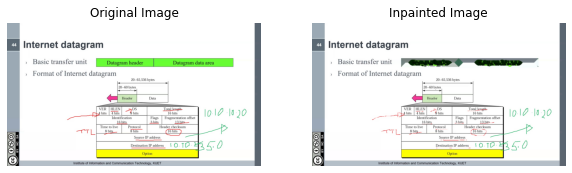

In [8]:
import cv2
import numpy as np

def remove_paint(image):
   
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper color thresholds for red paint
    lower_red = np.array([0, 50, 50], dtype=np.uint8)
    upper_red = np.array([10, 255, 255], dtype=np.uint8)

    # Create a mask for red paint
    red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

    # Define the lower and upper color thresholds for green paint
    lower_green = np.array([50, 50, 50], dtype=np.uint8)
    upper_green = np.array([70, 255, 255], dtype=np.uint8)

    # Create a mask for green paint
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Combine the red and green masks
    paint_mask = cv2.bitwise_or(red_mask, green_mask)

    # Apply inpainting to remove the paint regions
    inpainted_image = cv2.inpaint(image, paint_mask, 3, cv2.INPAINT_TELEA)

    return inpainted_image


# Provide the image path and annotation color (BGR format)
image_path =  '../images/video_MLT_pdf/frame3975.jpg'

# Load the image
image = cv2.imread(image_path)

# Remove the annotations from the image
result_image = remove_paint(image)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Inpainted Image')
axes[1].axis('off')